In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
df=df.drop("availability",axis='columns')
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
df.isna().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

650

In [18]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['bath', 'balcony', 'price']
Categorical Columns : ['area_type', 'location', 'size', 'society', 'total_sqft']


In [20]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [22]:
df[categorical_columns].describe().T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


In [24]:
df.nunique()

area_type        4
location      1305
size            31
society       2688
total_sqft    2117
bath            19
balcony          4
price         1994
dtype: int64

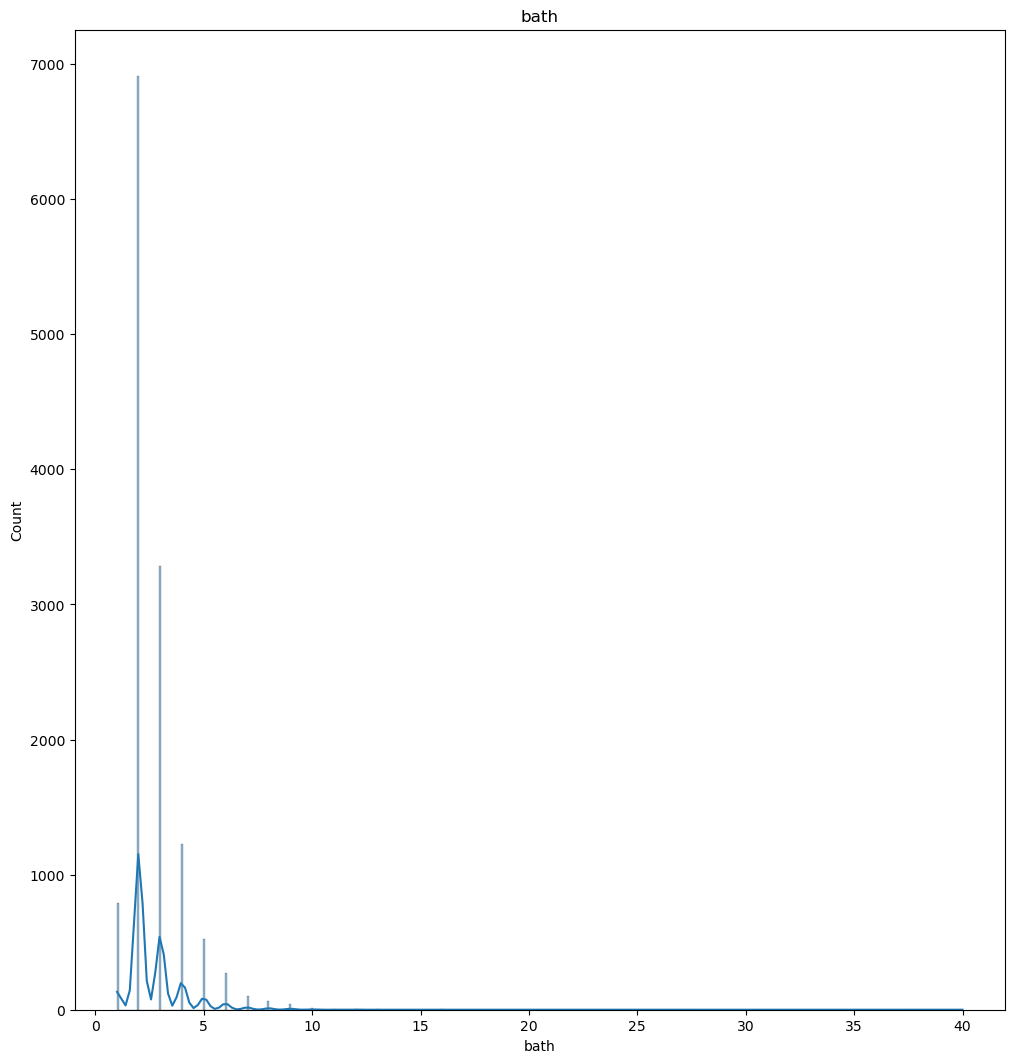

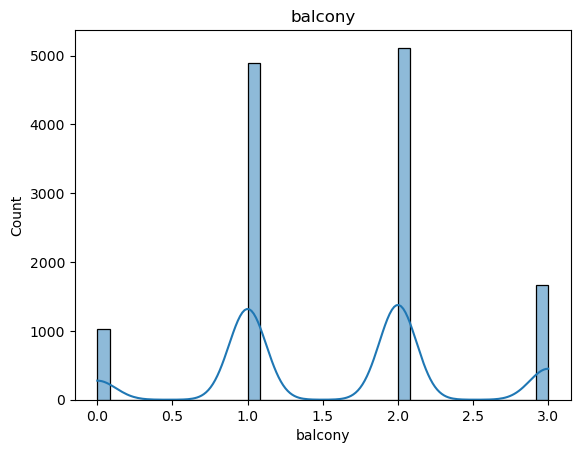

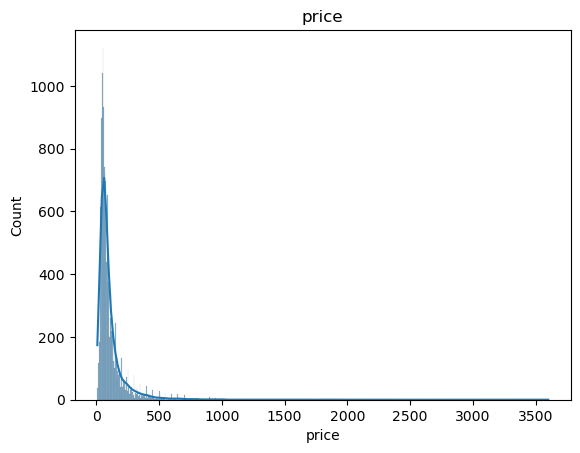

In [30]:
import seaborn as sn
plt.figure(figsize=(12,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sn.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

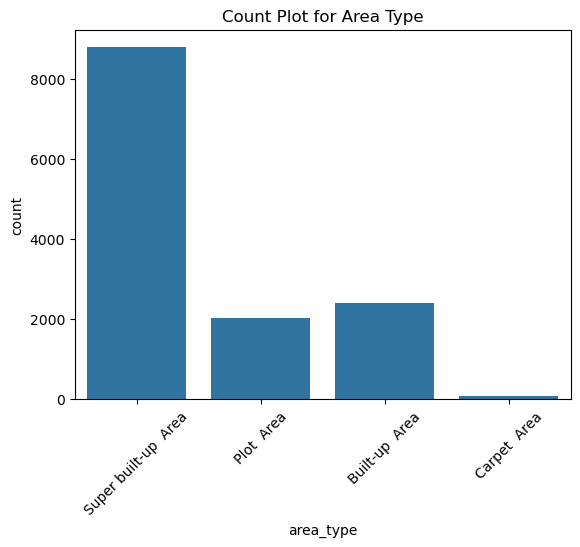

In [49]:
sn.countplot(data=df, x='area_type')
plt.title('Count Plot for Area Type')
plt.xticks(rotation=45)
plt.show()

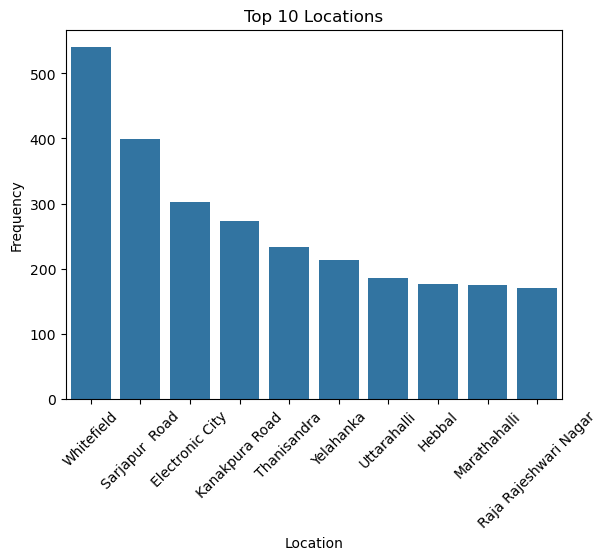

In [55]:
top_locations = df['location'].value_counts().nlargest(10)

sn.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


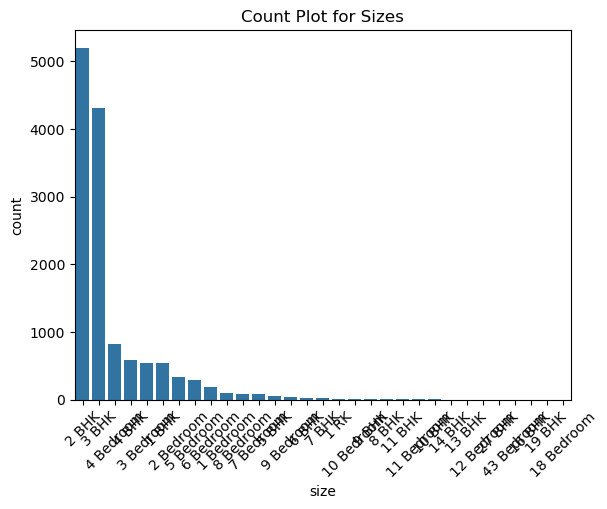

In [59]:
sn.countplot(data=df, x='size', order=df['size'].value_counts().index)
plt.title('Count Plot for Sizes')
plt.xticks(rotation=45)
plt.show()


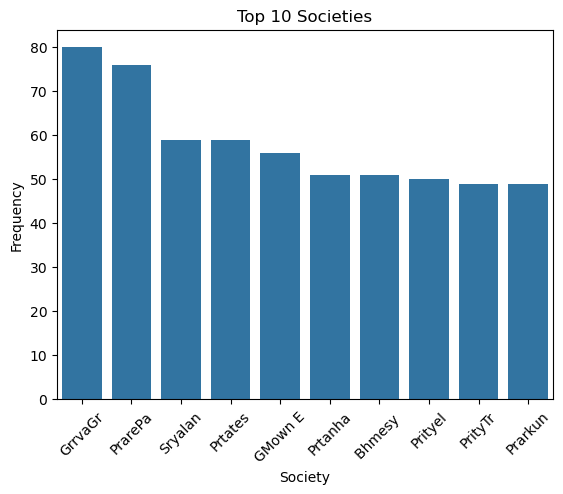

In [63]:
top_societies = df['society'].value_counts().nlargest(10)

sn.barplot(x=top_societies.index, y=top_societies.values)
plt.title('Top 10 Societies')
plt.xlabel('Society')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


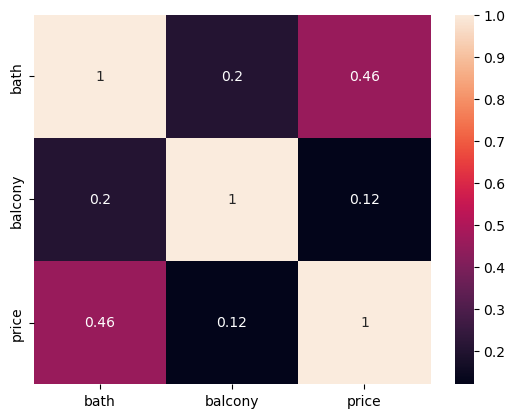

In [37]:
sn.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()


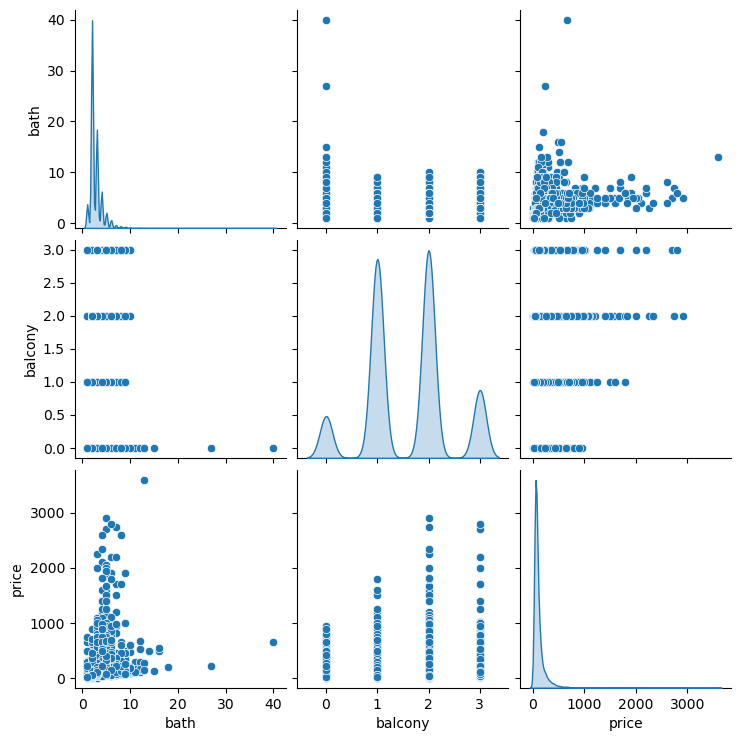

In [43]:
sn.pairplot(df,diag_kind='kde')
plt.show()